## Import libraries and load dataset

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [91]:
df = pd.read_csv('tmp_alb_tx_sums_202004021132.csv')
df.site_version.astype('category')
df= df[df['site_version']== '0000']
#check the decoration
df.columns

Index(['atoll_schema', 'site_version', 'site_name', 'fuze_site_id',
       'site_record_id', 'latitude_degrees', 'longitude_degrees',
       'street_address', 'city', 'county', 'state', 'zip_code', 'sector',
       'azimuth', 'antenna_model', 'antenna_manufacturer', 'antenna_max_gain',
       'antenna_centerline', 'lte_market', 'enodeb_id', 'max_power',
       'main_propagation_model', 'radio_manufacturer', 'radio_model',
       'extended_calculation_radius', 'enodeb_eutrancellfdd', 'channel_number',
       'pci', 'antenna_h_bw', 'mechanical_tilt', 'electrical_tilt', 'ret',
       'altitude_amsl', 'tac', 'cell_id', 'technology', 'band_class',
       'trans_cell_type', 'site_record_name', 'site_number', 'site_code',
       'location_name', 'fips_county_code', 'search_ring_id',
       'peoplesoft_location_code', 'site_on_air_date', 'c_ran_hub_name',
       'address_description', 'network_territory', 'network_market',
       'network_sub_market', 'network_local_market', 'site_altitude_ams

## Exploratory Data Analysis

### First things first: analysing 'Sum'

In [92]:
df['sum'].describe()

count    5.137000e+03
mean     5.685331e+08
std      1.227489e+09
min      9.001435e+02
25%      3.005578e+07
50%      1.627407e+08
75%      5.791687e+08
max      2.926708e+10
Name: sum, dtype: float64

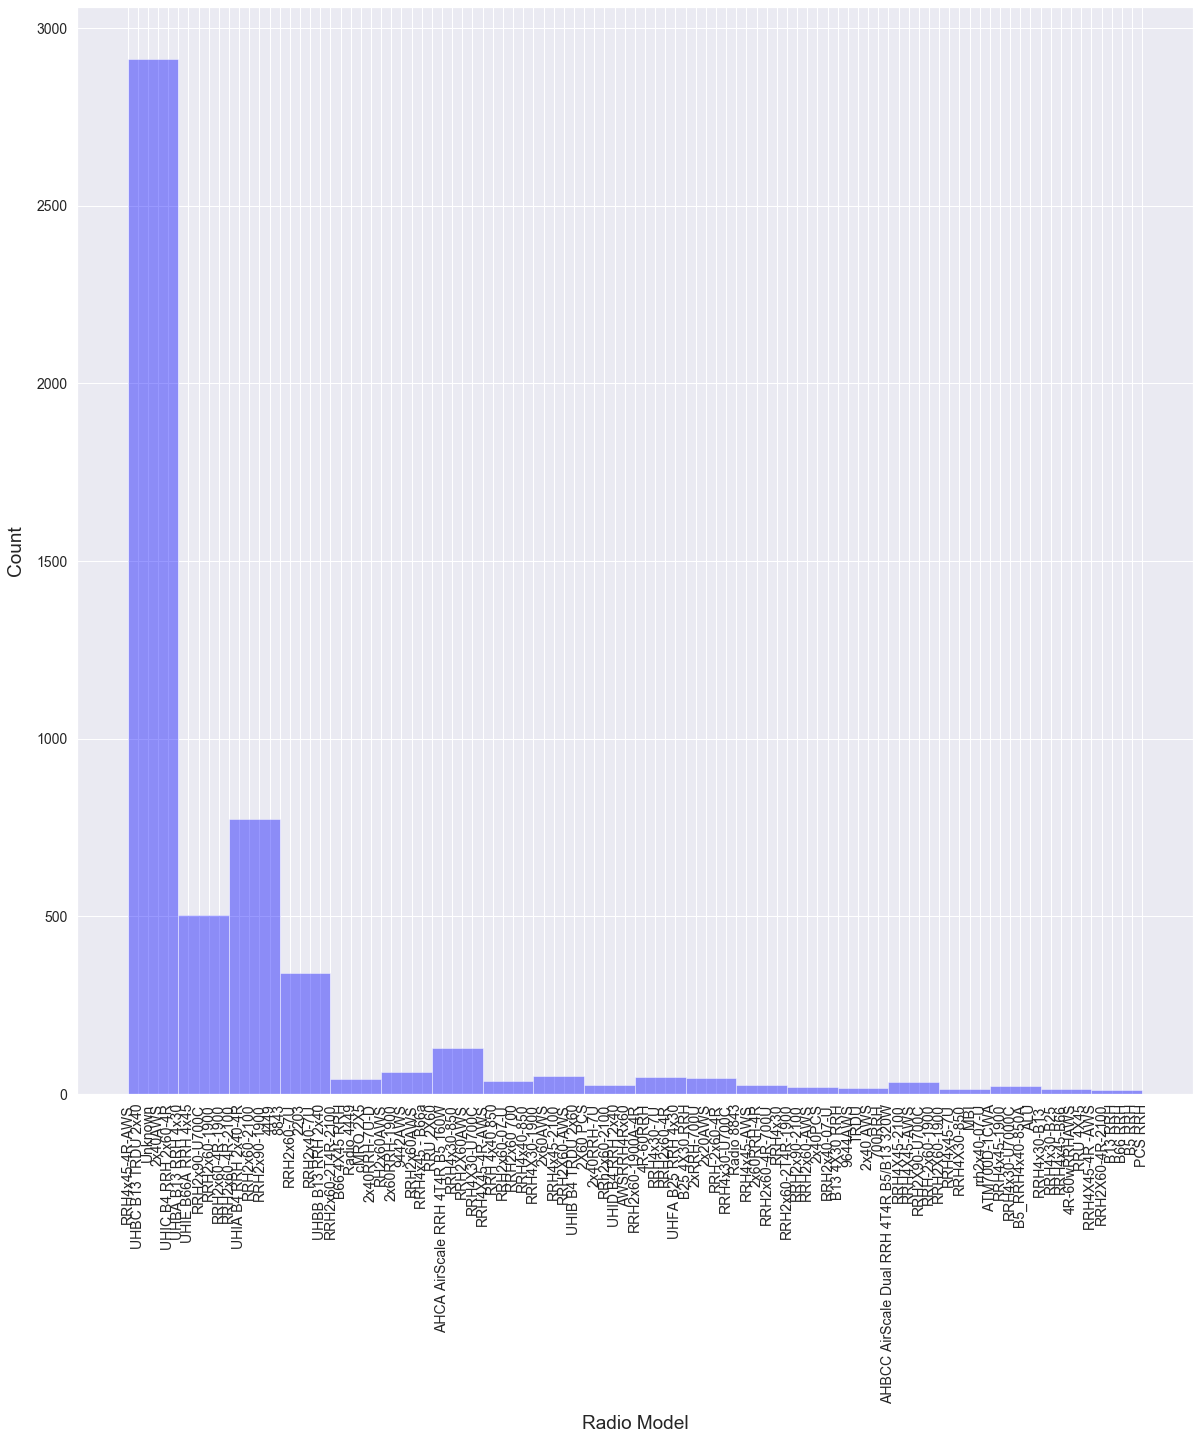

In [93]:
fig, ax = plt.subplots(figsize = (20, 20))
sns.distplot(df['radio_model'], kde=False,color='blue' ,bins=20)

plt.xlabel('Radio Model', fontsize=19, labelpad=11)
plt.xticks(rotation=90, fontsize=14)
plt.ylabel('Count', fontsize=19, labelpad=11)
plt.yticks(fontsize=14);

(array([   0.,  200.,  400.,  600.,  800., 1000., 1200., 1400., 1600.,
        1800.]), <a list of 10 Text yticklabel objects>)

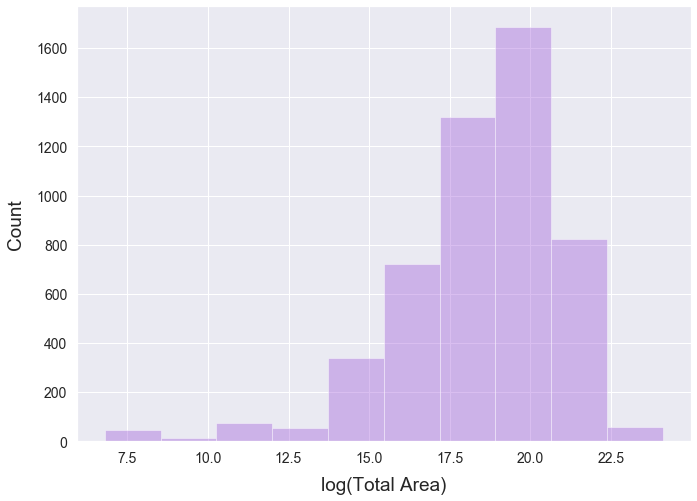

In [94]:
#looking at the distribution of my target after taking the log
fig, ax = plt.subplots(figsize = (11, 8))
sns.distplot(np.log(df['sum']), kde=False, color='#A15EDB', bins=10)

plt.xlabel('log(Total Area)', fontsize=19, labelpad=11)
plt.xticks(fontsize=14)
plt.ylabel('Count', fontsize=19, labelpad=11)
plt.yticks(fontsize=14)

### Check for Normality

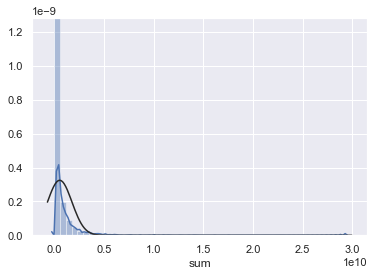

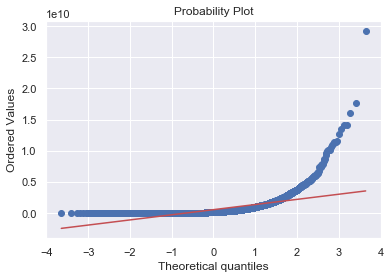

In [95]:
#histogram
#histogram and normal probability plot
sns.distplot(df['sum'], fit=norm);
fig = plt.figure()
res = stats.probplot(df['sum'], plot=plt)

### Facts about 'Sum'
#### -Deviates from the normal distribution.
#### -Have appreciable positive skewness
#### -Show peakedness
####  'Sum' is not normal. It shows 'peakedness', positive skewness and does not follow the diagonal line.

## Correlation matrix (heatmap style)

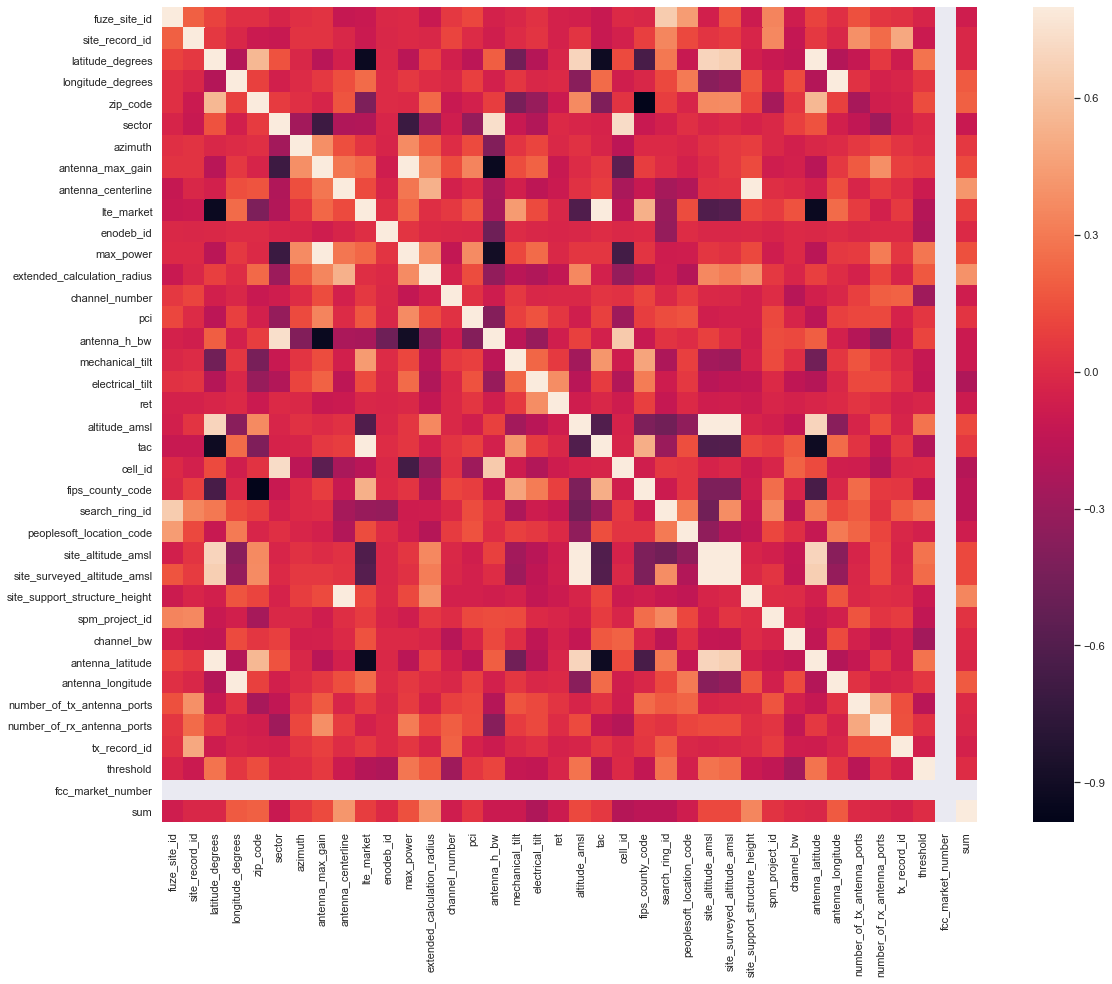

In [96]:
#correlation matrix
corrmat = df.corr()
f, ax = plt.subplots(figsize=(20, 15))
sns.heatmap(corrmat, vmax=.8, square=True);

#### We can see 'antenna_centerline','extended_calculation_radius', 'site_support_structure_height' and 'max_power' (to some extent) are important features and are correlated with the 'sum'

### 'Sum' correlation matrix (zoomed heatmap style)

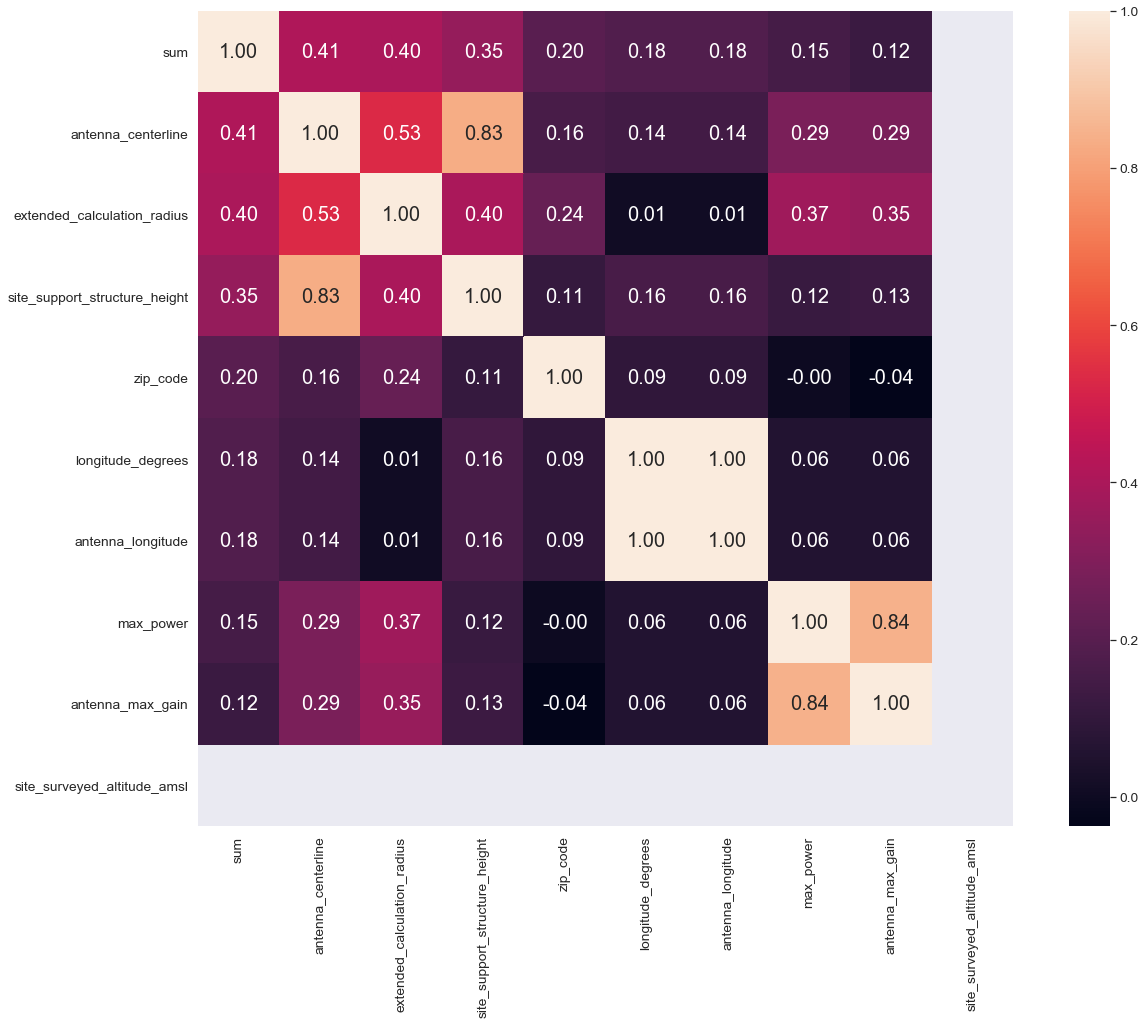

In [97]:
#sum correlation matrix
k = 10 #number of variables for heatmap
cols = corrmat.nlargest(k, 'sum')['sum'].index
cm = np.corrcoef(df[cols].values.T)
sns.set(font_scale=1.25)
f, ax = plt.subplots(figsize=(20, 15))
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 20}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

#### We see that 'antenna_centerline','extended_calculation_radius', 'site_support_structure_height' are somewhat correlated with the'Sum'.

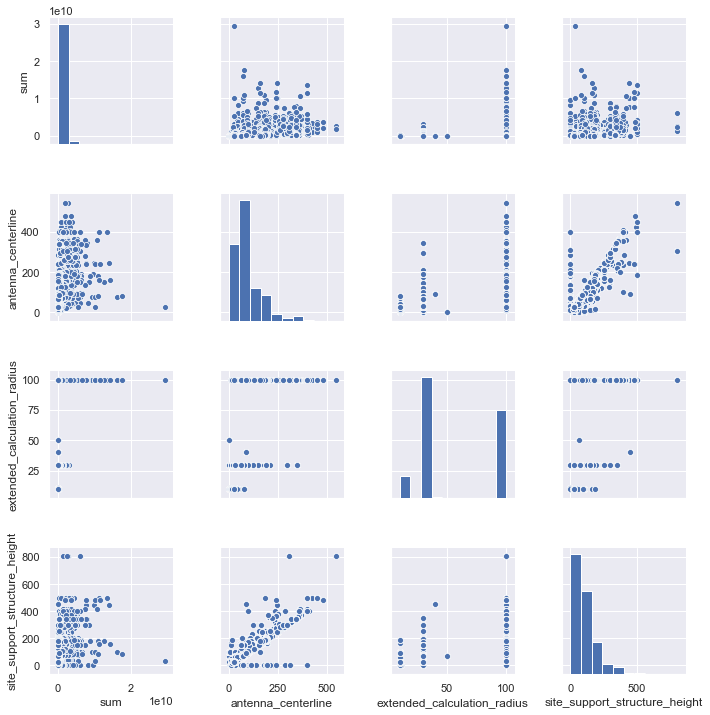

In [98]:
#scatterplot
sns.set()
cols = ['sum','antenna_centerline','extended_calculation_radius', 'site_support_structure_height']
sns.pairplot(df[cols], size = 2.5)
plt.show();

### The plot concerning 'Sum' and other features can also make us think.We see what almost appears to be a shy exponential function

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


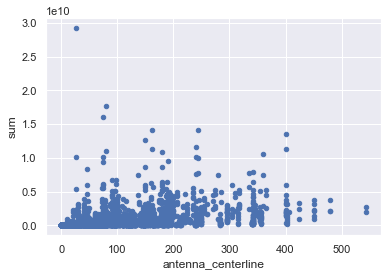

In [99]:
#scatter plot antenna_centerline/sum
var = 'antenna_centerline'
data = pd.concat([df['sum'], df[var]], axis=1)
data.plot.scatter(x=var, y='sum');

## Missing Data

In [100]:
#missing data
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent*100], axis=1, keys=['Total Missing Count', 'Percent'])
missing_data[missing_data['Total Missing Count'] !=0]

,Total Missing Count,Percent
fcc_market_number,5137,100.000000
c_ran_hub_name,5012,97.566673
site_on_air_date,4716,91.804555
site_structure_type,4696,91.415223
search_ring_id,4659,90.694958
threshold,4647,90.461359
coverage_type,4647,90.461359
duplex_type,4647,90.461359
xmtr_location,4647,90.461359
address_description,4470,87.015768


Text(0.5, 1.0, 'Percent missing data by feature')

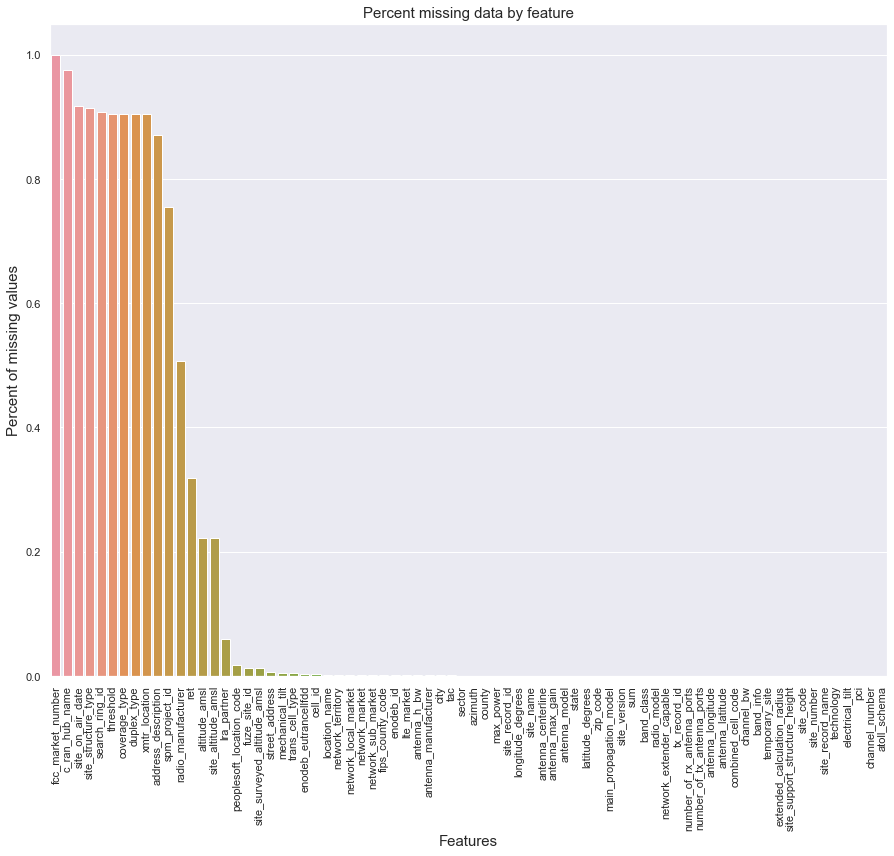

In [101]:
f, ax = plt.subplots(figsize=(15, 12))
plt.xticks(rotation='90')
sns.barplot(x=percent.index, y=percent)
plt.xlabel('Features', fontsize=15)
plt.ylabel('Percent of missing values', fontsize=15)
plt.title('Percent missing data by feature', fontsize=15)

#### We'll consider that when more than 15% of the data is missing, we should delete the corresponding variable and pretend it never existed. This means that we will not try any trick to fill the missing data in these cases.We can delete fcc_market_number,c_ran_hub_name, site_structure_type, threshold,coverage_type, search_ring_id,duplex_type xmtr_location,site_on_air_date,address_description,spm_project_id and radio_manufacturer,ret,site_altitude_amsl and altitude_amsl

In [102]:
#dealing with missing data
df = df.drop((missing_data[missing_data['Total Missing Count'] > 1000]).index,1)

In [103]:
#function to treat missing values
def fill_na_with_mean_or_mode(col):
    if col.dtype == int or col.dtype == float:
        return col.fillna(round(col.median()), inplace=True)
    else:
        return col.fillna(col.mode()[0], inplace=True)

In [104]:
#passed my function through a list comprehension so i could fill all null columns with one line of code
[fill_na_with_mean_or_mode(df[col]) for col in ['lra_partner','peoplesoft_location_code','fuze_site_id','site_surveyed_altitude_amsl',
                                                'street_address','trans_cell_type','mechanical_tilt','enodeb_eutrancellfdd','cell_id',
                                               'location_name','network_market','fips_county_code','network_territory','network_local_market',
                                               'network_sub_market','lte_market','enodeb_id','antenna_h_bw','antenna_manufacturer','tac',
                                               'city','sector','max_power','channel_bw','band_class','channel_number','pci']];
df.isnull().sum().max()

0

### In summary, to handle missing data, we deleted all the variables with missing data >1000 and for remaining we replaced with median/mode values

## Outliers

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


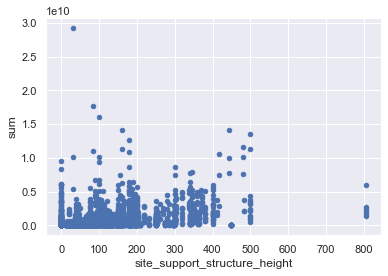

In [105]:
#bivariate analysis sum/site_support_structure_height
var = 'site_support_structure_height'
data = pd.concat([df['sum'], df[var]], axis=1)
data.plot.scatter(x=var, y='sum');

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


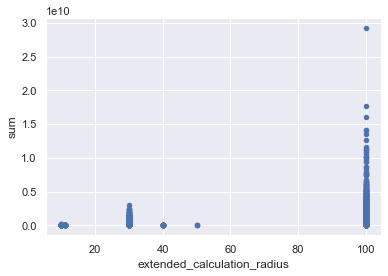

In [106]:
#bivariate analysis sum/extended_calculation_radius
var = 'extended_calculation_radius'
data = pd.concat([df['sum'], df[var]], axis=1)
data.plot.scatter(x=var, y='sum');

In [116]:
# deleting data points which are outliers
#df.sort_values(by = 'sum', ascending = False)[:2]
df = df.drop(df[df['fuze_site_id'] == 480809.0].index)
#df.sort_values(by = 'site_support_structure_height', ascending = False)[:3]
df = df.drop(df[df['fuze_site_id'] == 355319.0].index)

### The max value with highest 'sum' seem strange and they are not following the crowd. We can speculate why this is happening.Therefore, we'll define them as outliers and delete them.

## Dummy Variables (Categorical Data)

In [117]:
df_number=df.select_dtypes(np.number)
df_category= df.select_dtypes(object)
#convert categorical variable into dummy
get_dummy = pd.get_dummies(df_category)
#concat
df = pd.concat([df_number,get_dummy],axis=1)
df

,fuze_site_id,site_record_id,latitude_degrees,longitude_degrees,zip_code,sector,azimuth,antenna_max_gain,antenna_centerline,lte_market,...,combined_cell_code_6,combined_cell_code_66,combined_cell_code_7,combined_cell_code_8,combined_cell_code_9,combined_cell_code_A,combined_cell_code_L,combined_cell_code_P,combined_cell_code_e,combined_cell_code_f
0,355471.0,101508,36.457800,-105.598446,87571,3.0,240,15.562,37.0,25.0,...,0,0,0,0,0,0,0,0,0,0
1,676486.0,101524,32.305697,-106.738075,88011,1.0,240,13.300,38.0,26.0,...,1,0,0,0,0,0,0,0,0,0
6,355421.0,101443,34.797617,-106.820133,87031,1.0,45,13.540,120.0,25.0,...,0,0,0,0,0,0,0,0,0,0
7,985315.0,100862,33.353914,-104.524059,88201,2.0,120,16.000,100.0,26.0,...,0,0,0,1,0,0,0,0,0,0
8,355421.0,101443,34.797617,-106.820133,87031,2.0,165,13.540,120.0,25.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5912,676518.0,101438,34.057964,-106.890786,87801,2.0,230,15.600,88.0,25.0,...,0,0,0,0,1,0,0,0,0,0
5913,676518.0,101438,34.057964,-106.890786,87801,3.0,350,15.600,88.0,25.0,...,0,0,0,0,1,0,0,0,0,0
5914,676533.0,722741,33.327369,-105.585175,88346,1.0,30,15.590,168.0,26.0,...,0,0,0,0,0,0,0,0,0,0
5915,676533.0,722741,33.327369,-105.585175,88346,2.0,240,15.590,168.0,26.0,...,0,0,0,0,0,0,0,0,0,0


### Separating Features and Labels

In [118]:
# Labels are the values we want to predict
labels = np.array(df['sum'])
# Remove the labels from the features
# axis 1 refers to the columns
features= df.drop('sum', axis = 1)
# Saving feature names for later use
feature_list = list(features.columns)
# Convert to numpy array
#features = np.array(features)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
features = scaler.fit_transform(features)

### Split Train and Test Data using Sklearn

In [119]:
# Using Skicit-learn to split data into training and testing sets
from sklearn.model_selection import train_test_split
# Split the data into training and testing sets
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size = 0.20, random_state = 42)
print('Training Features Shape:', train_features.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Features Shape:', test_features.shape)
print('Testing Labels Shape:', test_labels.shape)

Training Features Shape: (4102, 10199)
Training Labels Shape: (4102,)
Testing Features Shape: (1026, 10199)
Testing Labels Shape: (1026,)


### Model - Random Forest Regressor

In [126]:
# Import the model we are using
from sklearn.ensemble import RandomForestRegressor
# Instantiate model with default parameters
rf = RandomForestRegressor(random_state = 42)
# Train the model on training data
rf.fit(train_features, train_labels)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [127]:
# Use the forest's predict method on the test data
predictions = rf.predict(test_features)

In [128]:
predictions

array([4.49289544e+08, 3.16123951e+06, 1.40275299e+09, ...,
       9.84916253e+08, 4.54438606e+08, 1.88435986e+08])

In [129]:
test_labels

array([6.50069998e+08, 4.15519452e+06, 1.53194203e+09, ...,
       1.20549800e+09, 8.69101930e+08, 2.73293775e+08])

In [130]:
from sklearn.metrics import r2_score,mean_squared_error
r2_score(test_labels, predictions)

0.6412281411413887

In [131]:
mse=mean_squared_error(test_labels, predictions)
rmse= np.sqrt(mse)
rmse

641857211.4122707

### Applying GridSearchCV and RandomSearchCV to find best parameters

#### GridSearchCV

In [163]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestRegressor
rfc = RandomForestRegressor()
param_grid = { 
    'n_estimators': [200,500],
    'max_features': ['auto', 'sqrt', 'log2'],
}
CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)
CV_rfc.fit(features, labels)
print(CV_rfc.best_params_)

{'max_features': 'auto', 'n_estimators': 500}


#### RandomSearchCV

In [38]:
#RandomSearchCV
rfc = RandomForestRegressor()
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randint
# specify parameters and distributions to sample from
param_dist = {"max_depth": [3, None],
              "max_features": ['auto', 'sqrt', 'log2'],
              "n_estimators": [200,500]}
random_search = RandomizedSearchCV(rfc, param_distributions=param_dist,
                                   n_iter=3, cv=5, iid=False, random_state=42)
random_search.fit(features, labels)
print(random_search.best_params_)

{'n_estimators': 500, 'max_features': 'sqrt', 'max_depth': None}


### Applying model with best parameters

In [164]:
regressor = RandomForestRegressor(max_features= 'auto',n_estimators = 500, random_state = 42)
# Train the model on training data
regressor.fit(train_features, train_labels)
predictions1 = regressor.predict(test_features)

### Prediction on test set

In [158]:
predictions1

array([4.06344154e+08, 3.06437830e+06, 1.97342899e+09, ...,
       9.17107108e+08, 4.25146014e+08, 2.01237947e+08])

In [159]:
test_labels

array([6.50069998e+08, 4.15519452e+06, 1.53194203e+09, ...,
       1.20549800e+09, 8.69101930e+08, 2.73293775e+08])

### Root Mean Squared Error (RMSE)

In [160]:
mse=mean_squared_error(test_labels, predictions1)
rmse= np.sqrt(mse)
print('The root mean squared error is ',rmse)

The root mean squared error is  629861572.2819749


### R-Squared Value

In [161]:
from sklearn.metrics import r2_score,mean_squared_error
r2_score(test_labels, predictions1)

0.6545129710727627

#### R-squared value 65% indicates that the model explains 65 percent variability of the response data around its mean (how close the data are to the fitted regression line)

In [162]:
actualvspredicted= pd.DataFrame({'Actual': test_labels,'Predicted': predictions1})
actualvspredicted.to_csv('Test_predictions.csv')
actualvspredicted

,Actual,Predicted
0,6.500700e+08,4.063442e+08
1,4.155195e+06,3.064378e+06
2,1.531942e+09,1.973429e+09
3,1.944061e+08,2.099434e+08
4,8.878759e+08,8.488751e+08
...,...,...
1021,2.317214e+09,2.331877e+09
1022,1.830249e+07,6.853226e+07
1023,1.205498e+09,9.171071e+08
1024,8.691019e+08,4.251460e+08


In [170]:
# split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size = .25, random_state = 55)

In [171]:
#import TPOT and sklearn stuff
import timeit
from tpot import TPOTRegressor
# instantiate tpot 
tpot = TPOTRegressor(verbosity=3,  
                    random_state=55, 
                    #scoring=rmsle,
                    periodic_checkpoint_folder="intermediate_results",
                    n_jobs=-1, 
                    warm_start = True,
                    generations=20, 
                    population_size=80,
                    early_stop=8)

In [ ]:
times = []
scores = []
winning_pipes = []

# run 2 iterations 
for x in range(1):
    start_time = timeit.default_timer()
    tpot.fit(X_train, y_train)
    elapsed = timeit.default_timer() - start_time
    times.append(elapsed)
    winning_pipes.append(tpot.fitted_pipeline_)
    scores.append(tpot.score(X_test, y_test))
    tpot.export('tpot_ames.py')
# output results
times = [time/60 for time in times]
print('Times:', times)
print('Scores:', scores)   
print('Winning pipelines:', winning_pipes)